In [2]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [3]:
class_names=['donut', 'alarm clock', 'baseball', 'blueberry', 'cookie', 
             'compass', 'hamburger', 'soccer ball', 'wheel', 'watermelon']

## Test

In [4]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [5]:
import os
import urllib
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [6]:
import numpy as np
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

donut           <class 'numpy.ndarray'>
alarm clock     <class 'numpy.ndarray'>
baseball        <class 'numpy.ndarray'>
blueberry       <class 'numpy.ndarray'>
cookie          <class 'numpy.ndarray'>
compass         <class 'numpy.ndarray'>
hamburger       <class 'numpy.ndarray'>
soccer ball     <class 'numpy.ndarray'>
wheel           <class 'numpy.ndarray'>
watermelon      <class 'numpy.ndarray'>


# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [7]:
for idx, name in enumerate(class_names):
    print('%-15s'%name, data[idx].shape)

donut           (140751, 784)
alarm clock     (123399, 784)
baseball        (135375, 784)
blueberry       (127878, 784)
cookie          (131353, 784)
compass         (127609, 784)
hamburger       (129672, 784)
soccer ball     (125349, 784)
wheel           (136659, 784)
watermelon      (132939, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

TypeError: 'function' object is not subscriptable

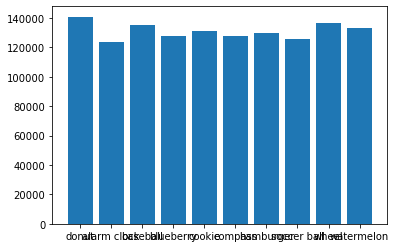

In [8]:
# labels = []
# for idx, class_name in enumerate(class_names):
#     for element in data[idx]:
#         labels.append(idx)

# plt.hist(labels, len(set(labels)))
plt.bar(class_names, [_.shape[0] for _ in data])
plt.ylabel['Images']
plt.title('Quick Draw - 10 class subset')
plt.xticks(rotation=90)

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

In [9]:
data = [_.reshape(-1, 28, 28) for _ in data]
# for idx, images in enumerate(data):
#     data[idx] = np.reshape(images, (images.shape[0], 28, 28))

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

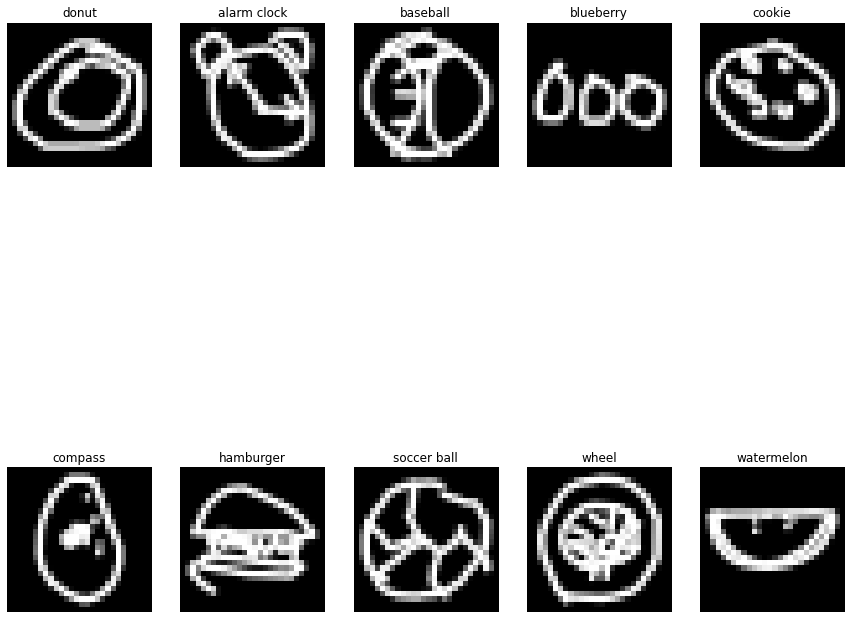

In [13]:
plt.figure(figsize=(15, 15))
for i, class_pictures in enumerate(data):
    plt.subplot(2, 5, 1+i)
    plt.imshow(class_pictures[0], cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[i])
    plt.axis('off')

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

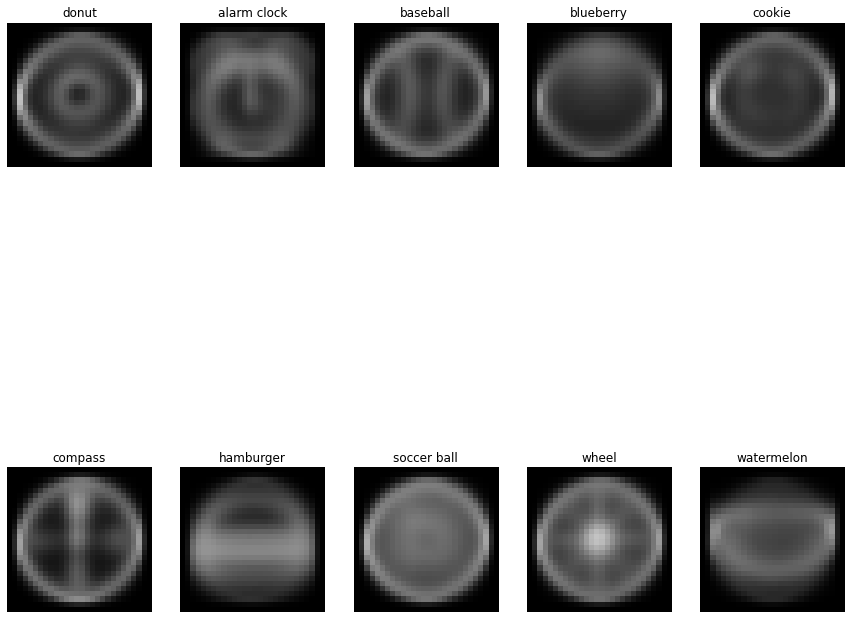

In [109]:
plt.figure(figsize=(15, 15))

for i, class_pictures in enumerate(data):
    plt.subplot(2, 5, 1+i)
    plt.imshow(np.mean(class_pictures, axis=0), cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[i])
    plt.axis('off')

# Wyślij rozwiązanie
Możesz skorzystać z jednego z poniższych sposobów:
**mailem na specjalny adres** ze strony pracy domowej w panelu programu prześlij jedno z poniższych:
- notebooka (jeżeli plik ma mniej niż np. 10MB)
- notebooka w zipie
- link do Colaba (udostępniony)
- link do pliku przez GDrive/Dropboxa/WeTransfer/...
- pdfa (poprzez download as pdf)

Najlepiej, by w notebooku było widać wyniki uruchomienia komórek, chyba, że przez nie plik będzie mieć 100+MB wtedy najlepiej Colab lub jakieś przemyślenie co poszło nie tak (zbyt dużo dużych zdjęć wyświetlonych w komórkach).

## Co otrzymasz?
Informację zwrotną z ewentualnymi sugestiami, komentarzami.